In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

In [13]:
df = pd.read_csv('data/Social_Network_Ads.csv')
X = df.iloc[:, [2,3]].values
y = df.iloc[:, 4].values

In [17]:
# Split into training and test data set (train_test_split)
# test_size - proportion of dataset to include in test_split when value is set as float between 0-1
# random_state - Acts as a seed value by random number generator that shuffles the data before splitting
#                into training and test sets.
#                By setting integer value, ensures same randomization process applied every time making
#                the train-test split deterministic and hence the same data partitions every time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# Feature Scaling
# Preprocessing technique to standardize numerical features, aka Z-scaler normalization.
# Transforms data to have mean of 0 and standard deviation of 1. 
# Machine learning algos perform better when features are same scale and centered around 0, especially
# true when algos use distance calc or gradient descent.
# fit() = calcultes the mean and SD. transform() applies standardization to new data. fit_transform()
# performs both steps
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

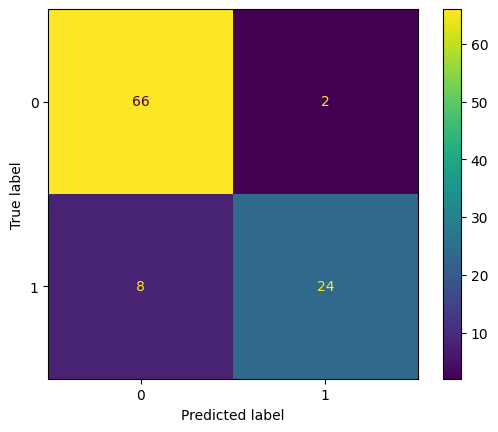

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

/tmp/ipykernel_3284/572685775.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


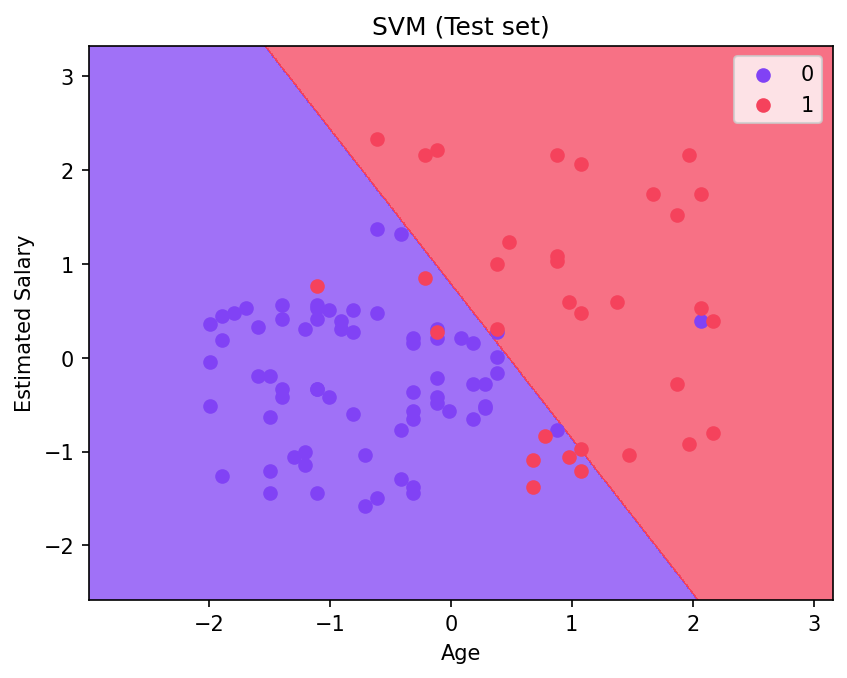

In [20]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(dpi=150)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#8142f5', '#f5425c')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#8142f5', '#f5425c'))(i), label = j)

plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()